# Vanilla Gradients 

Image gradients are a fundamental concept in image processing and computer vision, capturing how pixel intensities change across an image. Understanding vanilla gradients, or the basic calculation of image gradients, provides a crucial foundation for more advanced image analysis tasks. In this tutorial, we will delve into calculating gradients for color images, and visualizing their results by generating so called saliency maps. Get ready to see how image gradients can reveal the structure and details within your images :smile:.

__Step 1:__ Load the required libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow  as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D
import os
import numpy as np
from skimage import io, transform
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
import tensorflow as tf
import os 

# You can add more imports if necessary

:bell: You are free to add any library you deem necessary to successfully complete this homework assignment! 

For this tutorial, we will use a Cats vs. Dogs dataset, which consists of images featuring the two distinct animal classes. To make data preprocessing easier, we have already organized the images into separate folders. You will find a 'train' folder containing images used to train your model and a 'test' folder with images for evaluating your model's performance. You can download the preprocessed dataset, [here](https://edubuas-my.sharepoint.com/:f:/g/personal/blerck_i_buas_nl/Egas9AxZzg1MrAE8f8RtErwB1Xy1CKhaNiHQX9hJjTT4Ew?e=WbD2Md). 

__Step 2:__ Download the Cats vs. Dogs dataset, and and assign the paths to the train and test set folders to the variables ```src_path_train``` and ```src_path_train```. 

In [2]:
import os
import shutil
import random

source_dir = {
    'cats': "D://Holland Обучение//Block_C//Dataset_cats_and_dogs//cats//cats",
    'dogs': "D://Holland Обучение//Block_C//Dataset_cats_and_dogs//dogs//dogs"
}

train_dir = "D://Holland Обучение//Block_C//Dataset_cats_and_dogs//Cats_dogs//Train"
test_dir = "D://Holland Обучение//Block_C//Dataset_cats_and_dogs//Cats_dogs//Test"
val_dir = "D://Holland Обучение//Block_C//Dataset_cats_and_dogs//Cats_dogs//Validation"

# Create destination directories if they don't exist
for directory in [train_dir, test_dir, val_dir]:
    if not os.path.exists(directory):
        os.makedirs(directory)

# Define the percentage split
train_split = 0.8
test_split = 0.1
val_split = 0.1

# Iterate over each category (cats and dogs)
for category in source_dir.keys():
    # Get list of files in the category directory
    category_dir = source_dir[category]
    files = os.listdir(category_dir)
    num_files = len(files)
    
    # Shuffle the files
    random.shuffle(files)
    
    # Calculate split indices
    train_end = int(num_files * train_split)
    test_end = int(num_files * (train_split + test_split))
    
    # Assign files to train, test, and validation sets
    train_files = files[:train_end]
    test_files = files[train_end:test_end]
    val_files = files[test_end:]
    
    # Move files to respective directories
    for file in train_files:
        src = os.path.join(category_dir, file)
        dest = os.path.join(train_dir, category)
        shutil.move(src, dest)
        
    for file in test_files:
        src = os.path.join(category_dir, file)
        dest = os.path.join(test_dir, category)
        shutil.move(src, dest)
        
    for file in val_files:
        src = os.path.join(category_dir, file)
        dest = os.path.join(val_dir, category)
        shutil.move(src, dest)


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'D://Holland Обучение//Block_C//Dataset_cats_and_dogs//cats//cats'

In [3]:
train_dir = "D://Holland Обучение//Block_C//Dataset_cats_and_dogs//Cats_dogs//Train"
test_dir = "D://Holland Обучение//Block_C//Dataset_cats_and_dogs//Cats_dogs//Test"
val_dir = "D://Holland Обучение//Block_C//Dataset_cats_and_dogs//Cats_dogs//Validation"

__Step 3:__ Pre-process your data: 

- Rescale the images to have pixel values between 0 and 1.
- Resize the images to 224x224 pixels.
- Ensure that the images are in the correct format (e.g., RGB).
- One-hot encode the labels.
- Apply other preprocessing steps, such as horizontal flip and zoom, as necessary. 

In [13]:
from sklearn.preprocessing import LabelEncoder

def dataset(folder_path, height, width, channels):
    folder_paths = [
        os.path.join(folder_path, "cats"),
        os.path.join(folder_path, "dogs"),
    ]

    class_names = [
        "cats",
        "dogs",
    ]
    X = []
    y = []

    for i in range(len(folder_paths)):
        for filename in os.listdir(folder_paths[i]):
            file_extension = os.path.splitext(filename)[1]
            if file_extension.lower() in [".jpg", ".jpeg", ".png"]:
                image_filename = os.path.join(folder_paths[i], filename)
                image = io.imread(image_filename)
                # Resize image to desired dimensions
                image_resized = transform.resize(image, (height, width, channels))
                X.append(image_resized)
                y.append(i)  # Append the integer label directly

    X = np.array(X)
    y = np.array(y)
    
    return X, y, class_names

# Define the new dimensions for preprocessing
height = 224
width = 224
channels = 3

# Version 1 dataset
V1_X_train, V1_y_train, class_names = dataset(train_dir, height, width, channels)
V1_X_test, V1_y_test, class_names = dataset(test_dir, height, width, channels)
V1_X_val, V1_y_val, class_names = dataset(val_dir, height, width, channels)


__Step 4:__ Split your dataset into an 80% training set, 10% validation set, and 10% test set, and assign the sets to the following variables as a numpy array: ```X_train```, ```X_val```, ```X_test```, ```y_train```, ```y_val```, and ```y_test```.

- Already done in the cells above.

__Step 5:__ Design a Sequential model using the Keras API. Include at least one Conv2D layer for feature extraction, a Flatten layer to prepare the data for classification, and two Dense layers. Leave the second-to-last Dense layer without an activation function, but apply a softmax activation to the final output layer.

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

# Define the number of classes
num_classes = 1  # For binary classification, we only need one output unit

# Define the model
model = Sequential()

# Convolutional layer for feature extraction
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))  

# Flatten layer to prepare the data for classification
model.add(Flatten())

# Dense layers
model.add(Dense(64, activation='relu'))  # Decreased neurons
model.add(Dense(32))  # Decreased neurons

# Output layer with sigmoid activation for binary classification
model.add(Dense(num_classes, activation='sigmoid'))  # Only one unit for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 flatten_3 (Flatten)         (None, 788544)            0         
                                                                 
 dense_9 (Dense)             (None, 64)                50466880  
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 50469441 (192.53 MB)
Trainable params: 50469441 (192.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


__Step 6:__ Compile your model, and train it using the training and validation sets.

In [18]:
# Step 6: Compile and train the model

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(V1_X_train, V1_y_train, epochs=10, batch_size=10, validation_data=(V1_X_val, V1_y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(V1_X_test, V1_y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/10
237/237 [==============================] - 61s 254ms/step - loss: 2.6293 - accuracy: 0.5862 - val_loss: 0.7095 - val_accuracy: 0.6667
Epoch 2/10
237/237 [==============================] - 65s 273ms/step - loss: 0.4390 - accuracy: 0.8098 - val_loss: 0.8854 - val_accuracy: 0.5667
Epoch 3/10
237/237 [==============================] - 64s 269ms/step - loss: 0.2215 - accuracy: 0.9242 - val_loss: 1.1519 - val_accuracy: 0.5333
Epoch 4/10
237/237 [==============================] - 64s 270ms/step - loss: 0.0903 - accuracy: 0.9763 - val_loss: 1.3936 - val_accuracy: 0.5000
Epoch 5/10
237/237 [==============================] - 64s 271ms/step - loss: 0.0357 - accuracy: 0.9962 - val_loss: 1.5908 - val_accuracy: 0.5667
Epoch 6/10
237/237 [==============================] - 64s 271ms/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 1.9147 - val_accuracy: 0.5333
Epoch 7/10
237/237 [==============================] - 64s 269ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 2.0812 - val_ac

__Step 7:__ To compute a saliency map, you will need to create a new model that mirrors the structure of your original model but outputs the logits instead of the final class predictions. To achieve this, use the [tf.keras.Model](https://www.tensorflow.org/api_docs/python/tf/keras/Model) class, providing the same input as your original model and specifying the output of the second-to-last layer as the output of your new model. This new model will provide the raw scores needed for calculating the saliency map.

<iframe width="560" height="315" src="https://www.youtube-nocookie.com/embed/8ZcccMzTz7Y?si=0qbDBm0E662dFZYy" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

*Video 1. What is a Logit?*

In [19]:
import tensorflow as tf

# Define the new model
logits_model = tf.keras.Model(inputs=model.input, outputs=model.layers[-2].output)

# Display model summary
logits_model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3_input (InputLayer  [(None, 224, 224, 3)]     0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 flatten_3 (Flatten)         (None, 788544)            0         
                                                                 
 dense_9 (Dense)             (None, 64)                50466880  
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
Total params: 50469408 (192.53 MB)
Trainable params: 50469408 (192.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

__Step 8:__ A saliency map acts like a spotlight on your image, highlighting the pixels that were most crucial (i.e.., red color spectrum) for the model when making a specific prediction. In the next code block, we will define a function named ```get_saliency_map``` that calculates this map for a given image and class. Run the code block: 

In [20]:
def get_saliency_map(model, image, class_idx):
    # Element 1
    with tf.GradientTape() as tape: 
        tape.watch(image)

        predictions = model(image, training=False) # Element 2
        loss = tf.reduce_max(predictions[:, class_idx]) # Element 3
    gradient = tape.gradient(loss, image) # Element 4

    # Element 5
    gradient = tf.reduce_max(gradient, axis=-1)
    gradient = gradient.numpy()
    min_val, max_val = np.min(gradient), np.max(gradient)
    smap = (gradient - min_val) / (max_val - min_val + tf.keras.backend.epsilon())
    return smap

Let us dive into the function step-by-step, including the core math that makes it work:

- Element 1: TensorFlow's GradientTape is a context manager used for automatic differentiation, allowing you to compute gradients of a computation with respect to some inputs. Automatic differentiation is crucial for training neural networks. Here, it's used to calculate the gradients of a loss function with respect to the input image pixels. The tape.watch(image) call ensures that the image tensor is being tracked by the tape, allowing gradients with respect to it to be computed.

- Element 2: This line feeds the input image to the model to obtain the predictions. The model outputs logits or raw predictions for each class, which have not been normalized by the softmax layer yet. The training=False argument ensures that the model runs in inference mode, so operations like dropout or batch normalization are executed in their inference configuration.

- Element 3: The loss is calculated as the maximum logit value for the target class (class_idx). Mathematically, if $p$ represents the prediction vector for the image, and $p_i$ is the prediction (logit) for the target class, then the loss $L$ can be expressed as: 
$$L = max(p_i) $$
where $i$ is the index of the target class. This step focuses the gradient computation on the class of interest.

- Element 4: Here, we compute the gradient of the loss $L$ with respect to the input image. This gradient tells us how small changes in the input image pixels would affect the change in the computed loss. Mathematically, if $X$ represents the input image, then the gradient $\nabla{_xL}$ is the vector of partial derivatives: 

$$\nabla_{\mathbf{x}}L = \left[ \frac{\partial L}{\partial x_1}, \frac{\partial L}{\partial x_2}, \ldots, \frac{\partial L}{\partial x_n} \right]$$

where each $\frac{\partial L}{\partial x_i}$​ represents how much a tiny increase in pixel $i$'s value would increase the loss, holding all other pixels constant.

- Element 5: The gradient obtained in the previous step has the same shape as the input image (i.e., height x width x channels). To simplify it into a 2D saliency map, we use reduce_max across the color channels, effectively taking the maximum gradient magnitude across all channels for each pixel. This resulting 2D gradient map is then normalized to the range [0, 1] to make it suitable for visualization. The normalization is done by subtracting the minimum gradient value from all pixels and then dividing by the range of gradient values (i.e. Min-Max scaling). This process scales the gradient magnitudes to fit within a standard viewing range, highlighting the pixels most relevant to the model's prediction. 

Mathematically, the normalized saliency map $S$ for a pixel $x_i$​ is given by:

$$S(x_i) = \frac{x_i - \min(X)}{\max(X) - \min(X)}$$

where $\epsilon$ is a small constant (tensorflow.keras.backend.epsilon()) added to prevent division by zero in case the maximum and minimum gradients are the same. Finally, the function returns the normalized saliency map, smap.

__Step 9:__ Run the code block below, and let us see the results of the saliency map for a given image and class :tada:


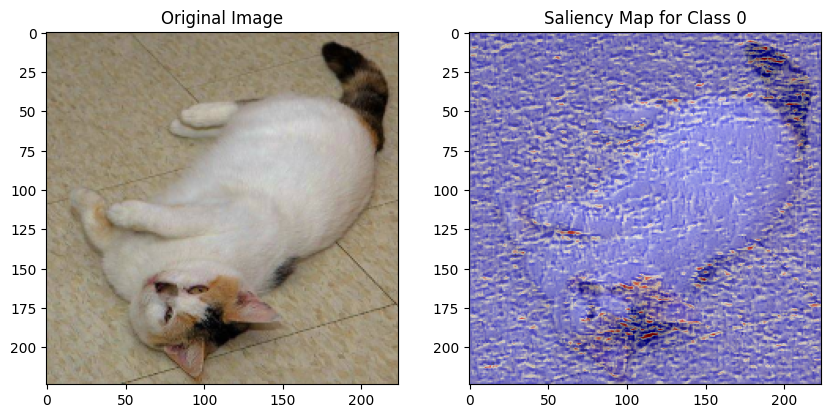

In [23]:
img_array = V1_X_test[8] # Image to explain
target_class = np.argmax(V1_y_test[8]) # Class to explain

saliency_map = get_saliency_map(logits_model, tf.expand_dims(img_array, 0), target_class)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_array)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(img_array)
plt.imshow(saliency_map[0], cmap='seismic', alpha=0.5)
plt.title(f'Saliency Map for Class {target_class}')
plt.show()

When you have successfully implemented the function, you should receive a saliency map that highlights the most important pixels for the model's prediction. For example: 

![Vanilla Gradients and Cat Image](https://edirlei.com/images/vanilla_gradients_cat.png)